# EPA EJScreen Connector - Quick Start Guide

**EPA EJScreen** (Environmental Justice Screening and Mapping Tool) provides environmental justice indicators:
- **Environmental Indicators**: PM2.5, ozone, diesel PM, traffic, toxic releases, etc.
- **Demographic Indicators**: Minority population, low income, limited English, etc.
- **EJ Indexes**: Combined environmental × demographic scores
- **Geographic Coverage**: Census tract, block group, county, and state levels

**Key Features:**
-  No API key required
-  11 environmental + 6 demographic indicators
-  Census tract-level resolution
-  State and national percentile rankings

**Data Domains:**
- D11: Environmental Quality
- D12: Environmental Justice
- D24: Geographic & Spatial Data

---

** DATA ACCESS NOTE**

EPA EJScreen does NOT have a real-time API. Data is provided as annual CSV/Shapefile downloads.

**EPA Main Site Currently Unavailable** (as of Oct 2025):
- https://www.epa.gov/ejscreen returns 404 errors
- Download page unavailable

**When EPA restores service:**
1. Visit https://www.epa.gov/ejscreen/download-ejscreen-data
2. Download the latest CSV file (e.g., `EJSCREEN_2024_StatePct_with_AS_CNMI_GU_VI.csv`)
3. Use this connector to load and analyze the data

**For This Tutorial:** We'll create sample data to demonstrate functionality.

---

**© 2025 KR-Labs. All rights reserved.**  
KR-Labs™ is a trademark of Quipu Research Labs, LLC, a subsidiary of Sudiata Giddasira, Inc.  
Licensed under the Apache License, Version 2.0

## 1. Installation

Install the KRL Data Connectors package:

In [1]:
# Uncomment to install
# !pip install krl-data-connectors

## 2. Initialize Connector

No API key needed!

In [2]:
from krl_data_connectors.environment import EJScreenConnector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Initialize connector
ejs = EJScreenConnector()

print(" EPA EJScreen connector initialized")
print("\n Available Indicator Categories:")
print(f"  Environmental: {len(ejs.ENVIRONMENTAL_INDICATORS)} indicators")
print(f"  Demographic: {len(ejs.DEMOGRAPHIC_INDICATORS)} indicators")
print(f"  EJ Indexes: {len(ejs.EJ_INDEX_INDICATORS)} indexes")

{"timestamp": "2025-10-20T03:06:00.229131Z", "level": "WARNING", "name": "EJScreenConnector", "message": "No API key provided", "source": {"file": "base_connector.py", "line": 72, "function": "__init__"}, "levelname": "WARNING", "taskName": "Task-21", "connector": "EJScreenConnector"}
{"timestamp": "2025-10-20T03:06:00.229817Z", "level": "INFO", "name": "EJScreenConnector", "message": "Connector initialized", "source": {"file": "base_connector.py", "line": 79, "function": "__init__"}, "levelname": "INFO", "taskName": "Task-21", "connector": "EJScreenConnector", "cache_dir": "~/.krl_cache", "cache_ttl": 3600, "has_api_key": false}
✅ EPA EJScreen connector initialized

📊 Available Indicator Categories:
  Environmental: 10 indicators
  Demographic: 6 indicators
  EJ Indexes: 6 indexes


## 3. Create Sample Data

Since EPA's download site is unavailable, we'll create representative sample data:

In [3]:
import numpy as np

# Create sample EJScreen data for Rhode Island and California
np.random.seed(42)

n_tracts_ri = 50
n_tracts_ca = 100

# Rhode Island data
ri_data = pd.DataFrame({
    'ID': [f'44{str(i).zfill(9)}' for i in range(n_tracts_ri)],
    'ST_ABBREV': ['RI'] * n_tracts_ri,
    'CNTY_FIPS': ['44007'] * 25 + ['44003'] * 25,  # Providence and Kent counties
    'ACSTOTPOP': np.random.randint(1000, 8000, n_tracts_ri),
    'P_PM25': np.random.uniform(20, 95, n_tracts_ri),
    'P_OZONE': np.random.uniform(15, 90, n_tracts_ri),
    'P_DSLPM': np.random.uniform(25, 92, n_tracts_ri),
    'P_PTRAF': np.random.uniform(18, 88, n_tracts_ri),
    'P_MINORTY': np.random.uniform(10, 95, n_tracts_ri),
    'P_LWINCPCT': np.random.uniform(15, 92, n_tracts_ri),
    'P_LNGISO': np.random.uniform(5, 85, n_tracts_ri),
    'P_D2_PM25': np.random.uniform(22, 96, n_tracts_ri),
    'P_D5_PM25': np.random.uniform(20, 94, n_tracts_ri),
})

# California data
ca_data = pd.DataFrame({
    'ID': [f'06{str(i).zfill(9)}' for i in range(n_tracts_ca)],
    'ST_ABBREV': ['CA'] * n_tracts_ca,
    'CNTY_FIPS': ['06037'] * 50 + ['06073'] * 50,  # Los Angeles and San Diego
    'ACSTOTPOP': np.random.randint(1500, 10000, n_tracts_ca),
    'P_PM25': np.random.uniform(30, 98, n_tracts_ca),
    'P_OZONE': np.random.uniform(35, 95, n_tracts_ca),
    'P_DSLPM': np.random.uniform(28, 96, n_tracts_ca),
    'P_PTRAF': np.random.uniform(25, 92, n_tracts_ca),
    'P_MINORTY': np.random.uniform(20, 98, n_tracts_ca),
    'P_LWINCPCT': np.random.uniform(18, 95, n_tracts_ca),
    'P_LNGISO': np.random.uniform(8, 90, n_tracts_ca),
    'P_D2_PM25': np.random.uniform(32, 98, n_tracts_ca),
    'P_D5_PM25': np.random.uniform(30, 96, n_tracts_ca),
})

# Combine datasets
sample_data = pd.concat([ri_data, ca_data], ignore_index=True)

# Save sample data
sample_data.to_csv('ejscreen_sample_data.csv', index=False)

print(f" Created sample data: {len(sample_data)} census tracts")
print(f"   States: {sample_data['ST_ABBREV'].nunique()}")
print(f"   Counties: {sample_data['CNTY_FIPS'].nunique()}")
sample_data.head()

✅ Created sample data: 150 census tracts
   States: 2
   Counties: 4


,ID,ST_ABBREV,CNTY_FIPS,ACSTOTPOP,P_PM25,P_OZONE,P_DSLPM,P_PTRAF,P_MINORTY,P_LWINCPCT,P_LNGISO,P_D2_PM25,P_D5_PM25
0,44000000000,RI,44007,1860,65.565864,79.732757,52.966537,41.874645,77.558961,83.530411,33.477814,30.744197,30.581384
1,44000000001,RI,44007,6390,32.789309,61.747360,39.881223,25.943146,52.724153,41.025627,65.627689,73.558550,76.351787
2,44000000002,RI,44007,6226,24.878869,39.817352,33.030980,82.728553,59.036830,43.919887,6.151479,68.541771,65.748137
3,44000000003,RI,44007,6191,91.166415,19.766876,47.620216,79.413755,51.864004,22.236609,14.285811,86.932929,27.483078
4,44000000004,RI,44007,4772,92.422402,38.323674,88.174950,36.055914,26.595654,59.527571,8.680211,76.395257,26.223904


## 4. Load Data

Load EJScreen data from CSV file:

**Note:** When EPA's site is available, replace `'ejscreen_sample_data.csv'` with the path to your downloaded EJScreen CSV file.

In [4]:
# Load the data
data = ejs.load_data('ejscreen_sample_data.csv')

print(f" Loaded {len(data)} census tracts")
print(f"\nColumns: {len(data.columns)}")
print(f"States: {', '.join(data['ST_ABBREV'].unique())}")

# Check available indicators
indicators = ejs.get_available_indicators(data)
print(f"\n Available Indicators:")
print(f"  Environmental: {len(indicators['environmental'])}")
print(f"  Demographic: {len(indicators['demographic'])}")
print(f"  EJ Indexes: {len(indicators['ej_index'])}")

✅ Loaded 150 census tracts

Columns: 13
States: RI, CA

📊 Available Indicators:
  Environmental: 4
  Demographic: 3
  EJ Indexes: 2


## 5. Filter by State

Get data for a specific state:

In [5]:
# Get Rhode Island data
ri_data = ejs.get_state_data(data, 'RI')

print(f" Rhode Island: {len(ri_data)} census tracts")
print(f"   Population: {ri_data['ACSTOTPOP'].sum():,}")
print(f"   Counties: {ri_data['CNTY_FIPS'].nunique()}")

ri_data.head()

✅ Rhode Island: 50 census tracts
   Population: 221,935
   Counties: 2


,ID,ST_ABBREV,CNTY_FIPS,ACSTOTPOP,P_PM25,P_OZONE,P_DSLPM,P_PTRAF,P_MINORTY,P_LWINCPCT,P_LNGISO,P_D2_PM25,P_D5_PM25
0,44000000000,RI,44007,1860,65.565864,79.732757,52.966537,41.874645,77.558961,83.530411,33.477814,30.744197,30.581384
1,44000000001,RI,44007,6390,32.789309,61.747360,39.881223,25.943146,52.724153,41.025627,65.627689,73.558550,76.351787
2,44000000002,RI,44007,6226,24.878869,39.817352,33.030980,82.728553,59.036830,43.919887,6.151479,68.541771,65.748137
3,44000000003,RI,44007,6191,91.166415,19.766876,47.620216,79.413755,51.864004,22.236609,14.285811,86.932929,27.483078
4,44000000004,RI,44007,4772,92.422402,38.323674,88.174950,36.055914,26.595654,59.527571,8.680211,76.395257,26.223904


## 6. Filter by County

Get data for a specific county:

In [6]:
# Get Providence County, RI (FIPS 44007)
providence = ejs.get_county_data(data, '44007')

print(f" Providence County: {len(providence)} census tracts")
print(f"   Population: {providence['ACSTOTPOP'].sum():,}")
print(f"   Avg PM2.5 percentile: {providence['P_PM25'].mean():.1f}")
print(f"   Avg minority percentile: {providence['P_MINORTY'].mean():.1f}")

✅ Providence County: 25 census tracts
   Population: 122,429
   Avg PM2.5 percentile: 59.9
   Avg minority percentile: 56.8


## 7. Environmental Indicator Analysis

Analyze environmental indicators:

📊 High PM2.5 Exposure (≥80th percentile):
   Tracts: 12 (24.0% of RI)
   Population affected: 59,389
   Avg PM2.5 percentile: 87.4


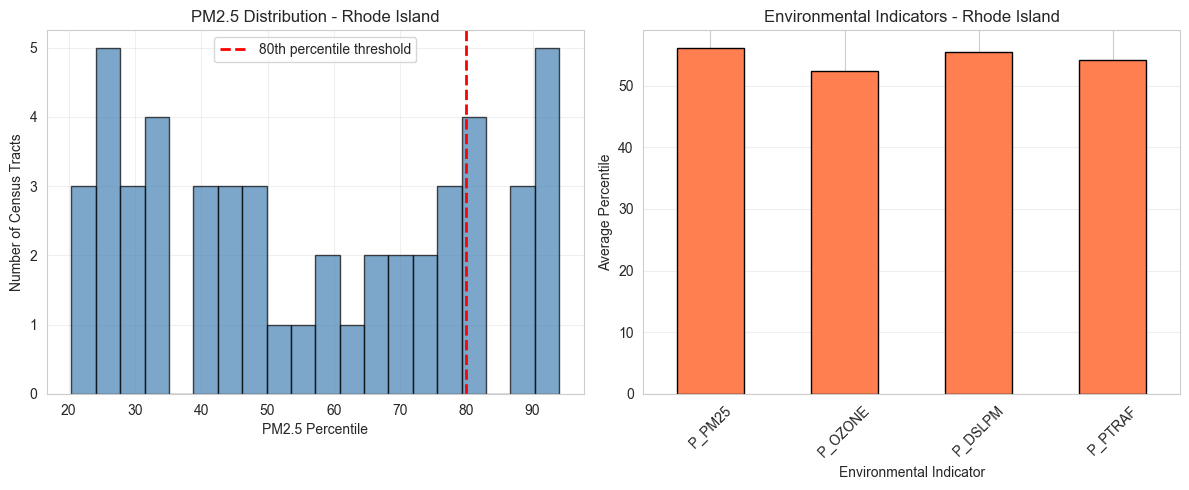

In [7]:
# Get high PM2.5 tracts (top 20%)
high_pm25 = ejs.filter_by_threshold(ri_data, 'P_PM25', threshold=80, above=True)

print(f" High PM2.5 Exposure (≥80th percentile):")
print(f"   Tracts: {len(high_pm25)} ({len(high_pm25)/len(ri_data)*100:.1f}% of RI)")
print(f"   Population affected: {high_pm25['ACSTOTPOP'].sum():,}")
print(f"   Avg PM2.5 percentile: {high_pm25['P_PM25'].mean():.1f}")

# Visualize PM2.5 distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ri_data['P_PM25'], bins=20, color='steelblue', alpha=0.7, edgecolor='black')
plt.axvline(80, color='red', linestyle='--', linewidth=2, label='80th percentile threshold')
plt.xlabel('PM2.5 Percentile')
plt.ylabel('Number of Census Tracts')
plt.title('PM2.5 Distribution - Rhode Island')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
env_indicators = ['P_PM25', 'P_OZONE', 'P_DSLPM', 'P_PTRAF']
ri_data[env_indicators].mean().plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Environmental Indicator')
plt.ylabel('Average Percentile')
plt.title('Environmental Indicators - Rhode Island')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 8. Demographic Analysis

Analyze demographic vulnerability indicators:

📊 Demographic Vulnerability (≥75th percentile):
   High minority population: 18 tracts
   High low-income population: 7 tracts


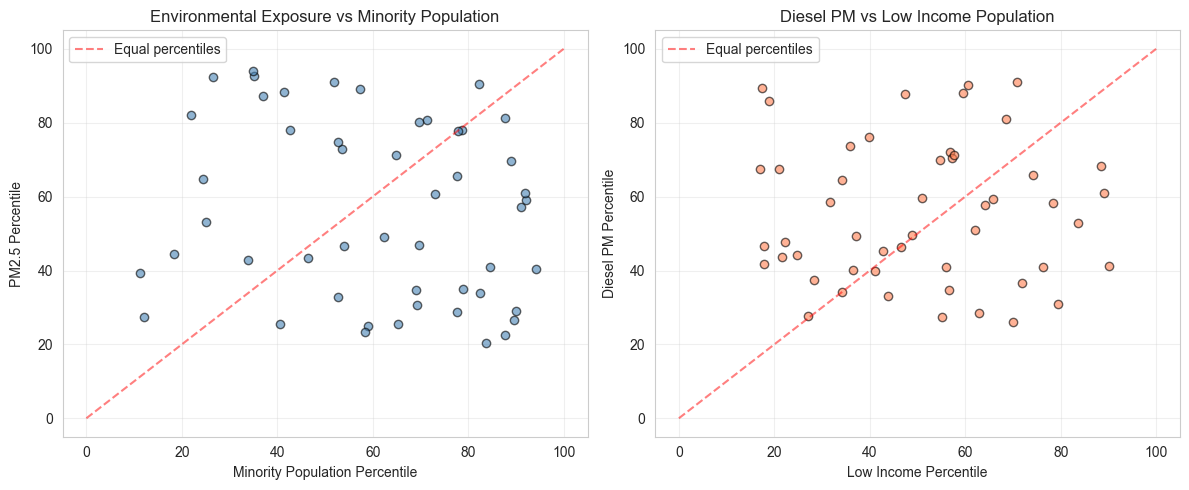

In [8]:
# Get high vulnerability tracts
high_minority = ejs.filter_by_threshold(ri_data, 'P_MINORTY', threshold=75, above=True)
high_low_income = ejs.filter_by_threshold(ri_data, 'P_LWINCPCT', threshold=75, above=True)

print(f" Demographic Vulnerability (≥75th percentile):")
print(f"   High minority population: {len(high_minority)} tracts")
print(f"   High low-income population: {len(high_low_income)} tracts")

# Visualize correlation between environmental and demographic factors
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(ri_data['P_MINORTY'], ri_data['P_PM25'], alpha=0.6, c='steelblue', edgecolors='black')
plt.xlabel('Minority Population Percentile')
plt.ylabel('PM2.5 Percentile')
plt.title('Environmental Exposure vs Minority Population')
plt.grid(True, alpha=0.3)

# Add diagonal line for reference
plt.plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Equal percentiles')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(ri_data['P_LWINCPCT'], ri_data['P_DSLPM'], alpha=0.6, c='coral', edgecolors='black')
plt.xlabel('Low Income Percentile')
plt.ylabel('Diesel PM Percentile')
plt.title('Diesel PM vs Low Income Population')
plt.grid(True, alpha=0.3)
plt.plot([0, 100], [0, 100], 'r--', alpha=0.5, label='Equal percentiles')
plt.legend()

plt.tight_layout()
plt.show()

## 9. Identify High Environmental Justice Burden Tracts

Find census tracts with **both** high environmental exposure **and** high demographic vulnerability:

⚠️  High Environmental Justice Burden Tracts:
   Identified: 2 tracts
   % of state: 4.0%
   Population: 9,091

   Avg PM2.5 percentile: 85.8
   Avg minority percentile: 85.0
   Avg EJ index (PM2.5): 59.0


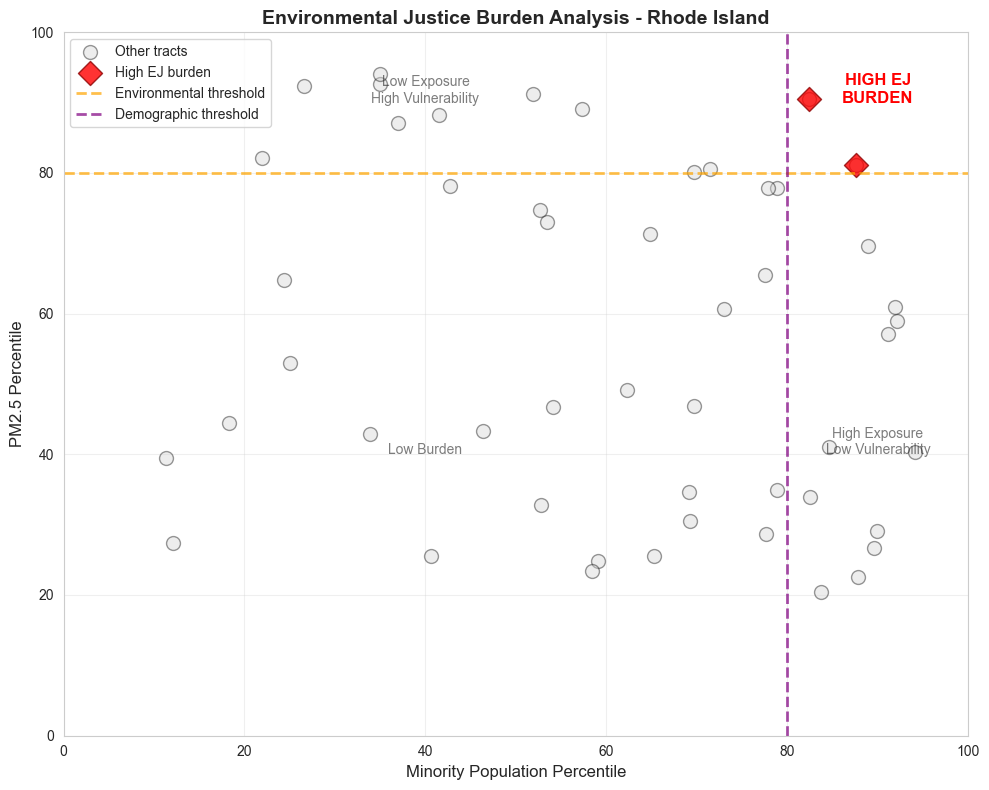

In [9]:
# Identify high burden tracts (EJ communities)
ej_tracts = ejs.get_high_burden_tracts(
    ri_data,
    environmental_threshold=80,  # Top 20% environmental exposure
    demographic_threshold=80,     # Top 20% demographic vulnerability
    environmental_indicator='P_PM25',
    demographic_indicator='P_MINORTY'
)

print(f"  High Environmental Justice Burden Tracts:")
print(f"   Identified: {len(ej_tracts)} tracts")
print(f"   % of state: {len(ej_tracts)/len(ri_data)*100:.1f}%")
print(f"   Population: {ej_tracts['ACSTOTPOP'].sum():,}")
print(f"\n   Avg PM2.5 percentile: {ej_tracts['P_PM25'].mean():.1f}")
print(f"   Avg minority percentile: {ej_tracts['P_MINORTY'].mean():.1f}")
print(f"   Avg EJ index (PM2.5): {ej_tracts['P_D2_PM25'].mean():.1f}")

# Visualize EJ burden quadrants
plt.figure(figsize=(10, 8))
plt.scatter(ri_data['P_MINORTY'], ri_data['P_PM25'], 
           alpha=0.4, c='lightgray', s=100, edgecolors='black', label='Other tracts')
plt.scatter(ej_tracts['P_MINORTY'], ej_tracts['P_PM25'], 
           alpha=0.8, c='red', s=150, edgecolors='darkred', label='High EJ burden', marker='D')

# Add threshold lines
plt.axhline(80, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='Environmental threshold')
plt.axvline(80, color='purple', linestyle='--', linewidth=2, alpha=0.7, label='Demographic threshold')

# Add quadrant labels
plt.text(90, 90, 'HIGH EJ\nBURDEN', ha='center', fontsize=12, fontweight='bold', color='red')
plt.text(90, 40, 'High Exposure\nLow Vulnerability', ha='center', fontsize=10, alpha=0.6)
plt.text(40, 90, 'Low Exposure\nHigh Vulnerability', ha='center', fontsize=10, alpha=0.6)
plt.text(40, 40, 'Low Burden', ha='center', fontsize=10, alpha=0.6)

plt.xlabel('Minority Population Percentile', fontsize=12)
plt.ylabel('PM2.5 Percentile', fontsize=12)
plt.title('Environmental Justice Burden Analysis - Rhode Island', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.ylim(0, 100)

plt.tight_layout()
plt.show()

## 10. EJ Index Analysis

Analyze combined Environmental Justice indexes:

📊 High EJ Index Tracts (≥85th percentile):
   PM2.5 EJ Index: 10 tracts
   Population: 48,695


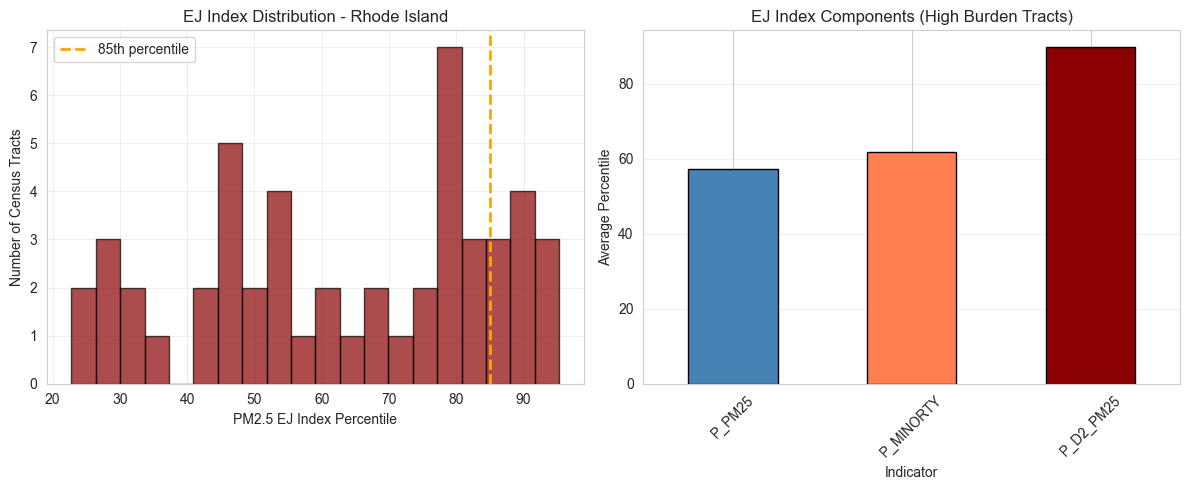

In [10]:
# Compare EJ indexes
high_ej_index = ejs.filter_by_threshold(ri_data, 'P_D2_PM25', threshold=85, above=True)

print(f" High EJ Index Tracts (≥85th percentile):")
print(f"   PM2.5 EJ Index: {len(high_ej_index)} tracts")
print(f"   Population: {high_ej_index['ACSTOTPOP'].sum():,}")

# Visualize EJ index distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(ri_data['P_D2_PM25'], bins=20, color='darkred', alpha=0.7, edgecolor='black')
plt.axvline(85, color='orange', linestyle='--', linewidth=2, label='85th percentile')
plt.xlabel('PM2.5 EJ Index Percentile')
plt.ylabel('Number of Census Tracts')
plt.title('EJ Index Distribution - Rhode Island')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
# Compare EJ index components
high_ej_index[['P_PM25', 'P_MINORTY', 'P_D2_PM25']].mean().plot(
    kind='bar', color=['steelblue', 'coral', 'darkred'], edgecolor='black'
)
plt.xlabel('Indicator')
plt.ylabel('Average Percentile')
plt.title('EJ Index Components (High Burden Tracts)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 11. State-Level Comparison

Compare environmental justice indicators across states:

📊 State-Level Summary:
  ST_ABBREV     P_PM25                                     P_OZONE             \
                  mean     median        min        max       mean     median   
0        CA  62.572703  63.525955  30.176462  97.065476  67.833094  69.604541   
1        RI  56.169939  55.074853  20.414159  94.016520  52.447610  53.224425   

                         P_MINORTY  ...                       P_LWINCPCT  \
         min        max       mean  ...        min        max       mean   
0  35.162654  94.861557  58.507578  ...  20.018527  97.949573  59.002770   
1  15.521410  84.727324  60.852229  ...  11.313812  94.154577  50.290873   

                                    P_D2_PM25                                   
      median        min        max       mean     median        min        max  
0  59.440685  18.086249  94.717855  67.338358  70.245775  33.212264  97.480799  
1  52.803087  16.952007  90.140610  63.342313  66.488087  22.801986  95.297381  

[2 rows x 21 columns]


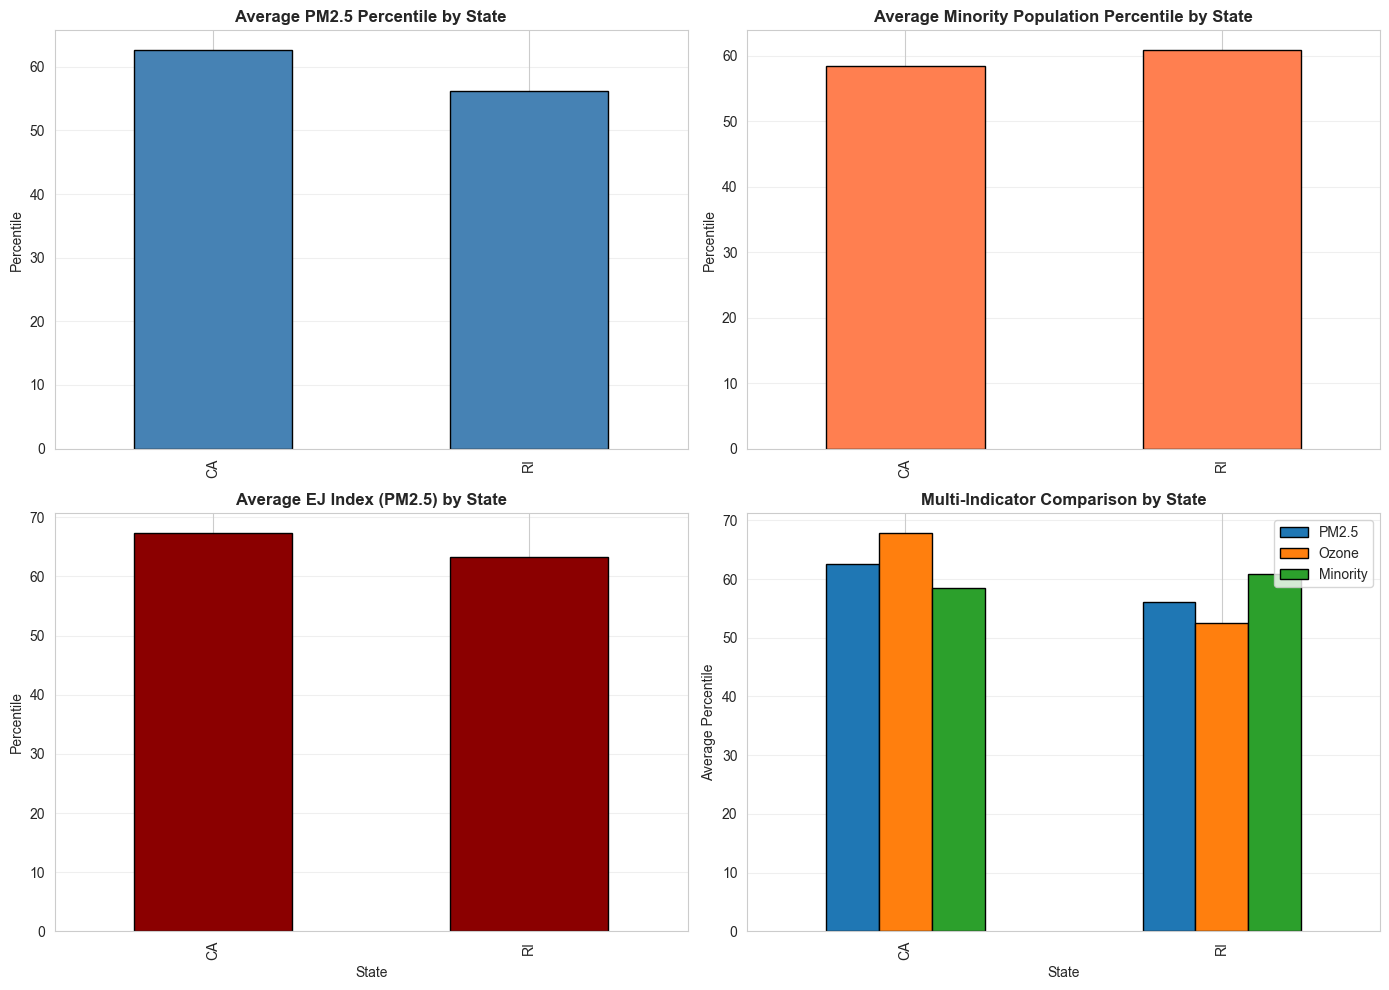

In [11]:
# Summarize by state
summary = ejs.summarize_by_state(
    data, 
    indicators=['P_PM25', 'P_OZONE', 'P_MINORTY', 'P_LWINCPCT', 'P_D2_PM25']
)

print(" State-Level Summary:")
print(summary)

# Visualize state comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# PM2.5 comparison
ax1 = axes[0, 0]
summary.set_index('ST_ABBREV')[('P_PM25', 'mean')].plot(kind='bar', ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Average PM2.5 Percentile by State', fontweight='bold')
ax1.set_ylabel('Percentile')
ax1.set_xlabel('')
ax1.grid(True, alpha=0.3, axis='y')

# Minority population comparison
ax2 = axes[0, 1]
summary.set_index('ST_ABBREV')[('P_MINORTY', 'mean')].plot(kind='bar', ax=ax2, color='coral', edgecolor='black')
ax2.set_title('Average Minority Population Percentile by State', fontweight='bold')
ax2.set_ylabel('Percentile')
ax2.set_xlabel('')
ax2.grid(True, alpha=0.3, axis='y')

# EJ index comparison
ax3 = axes[1, 0]
summary.set_index('ST_ABBREV')[('P_D2_PM25', 'mean')].plot(kind='bar', ax=ax3, color='darkred', edgecolor='black')
ax3.set_title('Average EJ Index (PM2.5) by State', fontweight='bold')
ax3.set_ylabel('Percentile')
ax3.set_xlabel('State')
ax3.grid(True, alpha=0.3, axis='y')

# Multi-indicator comparison
ax4 = axes[1, 1]
indicators_to_plot = [('P_PM25', 'mean'), ('P_OZONE', 'mean'), ('P_MINORTY', 'mean')]
summary.set_index('ST_ABBREV')[indicators_to_plot].plot(kind='bar', ax=ax4, edgecolor='black')
ax4.set_title('Multi-Indicator Comparison by State', fontweight='bold')
ax4.set_ylabel('Average Percentile')
ax4.set_xlabel('State')
ax4.legend(['PM2.5', 'Ozone', 'Minority'], loc='upper right')
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 12. Export Results

Save analysis results for further use:

In [12]:
# Export high burden tracts
ej_tracts.to_csv('ejscreen_high_burden_tracts.csv', index=False)

# Export state summary
summary.to_csv('ejscreen_state_summary.csv', index=False)

# Export Rhode Island analysis
ri_data.to_csv('ejscreen_rhode_island.csv', index=False)

print(" Data exported successfully!")
print(f"  - High burden tracts: {len(ej_tracts)} records")
print(f"  - State summary: {len(summary)} states")
print(f"  - Rhode Island data: {len(ri_data)} tracts")

✅ Data exported successfully!
  - High burden tracts: 2 records
  - State summary: 2 states
  - Rhode Island data: 50 tracts


## 13. Summary Statistics

In [13]:
print("=" * 70)
print("EPA EJSCREEN ANALYSIS SUMMARY")
print("=" * 70)

print(f"\n Dataset Overview:")
print(f"  Total census tracts: {len(data):,}")
print(f"  States analyzed: {data['ST_ABBREV'].nunique()}")
print(f"  Counties: {data['CNTY_FIPS'].nunique()}")
print(f"  Total population: {data['ACSTOTPOP'].sum():,}")

print(f"\n  Environmental Justice Findings:")
print(f"  High EJ burden tracts: {len(ej_tracts)} ({len(ej_tracts)/len(ri_data)*100:.1f}% of RI)")
print(f"  Population in high burden areas: {ej_tracts['ACSTOTPOP'].sum():,}")
print(f"  Avg environmental exposure (PM2.5): {ej_tracts['P_PM25'].mean():.1f} percentile")
print(f"  Avg demographic vulnerability: {ej_tracts['P_MINORTY'].mean():.1f} percentile")

print(f"\n State Comparison:")
for state in data['ST_ABBREV'].unique():
    state_data = data[data['ST_ABBREV'] == state]
    print(f"  {state}:")
    print(f"    Tracts: {len(state_data):,}")
    print(f"    Avg PM2.5: {state_data['P_PM25'].mean():.1f}")
    print(f"    Avg EJ Index: {state_data['P_D2_PM25'].mean():.1f}")

print("\n" + "=" * 70)

EPA EJSCREEN ANALYSIS SUMMARY

📊 Dataset Overview:
  Total census tracts: 150
  States analyzed: 2
  Counties: 4
  Total population: 840,952

⚠️  Environmental Justice Findings:
  High EJ burden tracts: 2 (4.0% of RI)
  Population in high burden areas: 9,091
  Avg environmental exposure (PM2.5): 85.8 percentile
  Avg demographic vulnerability: 85.0 percentile

🌍 State Comparison:
  RI:
    Tracts: 50
    Avg PM2.5: 56.2
    Avg EJ Index: 63.3
  CA:
    Tracts: 100
    Avg PM2.5: 62.6
    Avg EJ Index: 67.3



## 14. Next Steps

**Working with Real EJScreen Data:**

When EPA's download site becomes available:
1. Visit https://www.epa.gov/ejscreen/download-ejscreen-data
2. Download the latest CSV file (typically ~1GB)
3. Replace `'ejscreen_sample_data.csv'` with your downloaded file path
4. Run the same analysis on complete national data

**Additional Analysis Ideas:**
- Time series analysis (if you have multiple years)
- Spatial autocorrelation (Moran's I)
- Regression modeling (environmental vs demographic)
- Cumulative impact assessment
- Hot spot analysis (Getis-Ord Gi*)

**Related Connectors:**
- CDC WONDER Connector (health outcomes)
- Census Connector (demographic data)
- LEHD Connector (employment patterns)
- County Business Patterns (economic activity)

---

**Questions or Issues?**  
Visit: https://github.com/KR-Labs/krl-data-connectors/issues

**Documentation:**  
https://docs.krlabs.dev/data-connectors